In [1]:
!pip -q install ./python

ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.
tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np

# Set up environment
env = UnityEnvironment(file_name="Banana.app)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


## Train

In [9]:
from agent_module import Agent
import matplotlib.pyplot as plt
import torch

def train(num_episodes, env, brain_name, state_size, action_size, eps, eps_decay, buff_size, samp_size, learn_freq, gamma, optim_lr, tau, net_params):
    PRINT_EVERY = 10
    agent = Agent(state_size, action_size, eps, eps_decay, buff_size, samp_size, learn_freq, gamma, optim_lr, tau, net_params)
    scores = []
    for i_episode in range(num_episodes):
        
        score = 0
        env_info = env.reset(train_mode=True)[brain_name] # reset environment
        state = env_info.vector_observations[0]
        step = 0

        while True:
            step += 1
            print('Step: {}'.format(step), end='\r', flush=True)
            action = agent.action(state)  # Take action
            # Interact, collect next state, reward
            env_info = env.step(action)[brain_name]
            state_next = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            # Save experience tuple (update value function approximation occasionaly [NN weights])
            agent.step(state, action, reward, state_next, done)
            state = state_next
            # Monitoring
            score += reward

            if done:
                scores.append(score)
                if i_episode % PRINT_EVERY==0:
                    print('Episode {} Average score: {}'.format(i_episode, np.mean(scores[-PRINT_EVERY:])))
                break
        
        mean_score = np.mean(scores[-100:])
        if mean_score > 13.0:
            print('Environment solved in {} Episodes. Average score over last 100 episodes is {:.2f}.'.format(i_episode, mean_score))
            torch.save(agent.current_net.state_dict(), 'state_dict')
            plt.plot(range(i_episode+1), scores)
            break
            
            
    return scores, agent


Episode 0 Average score: -2.0
Episode 10 Average score: 0.3
Episode 20 Average score: 0.5
Episode 30 Average score: 0.3
Episode 40 Average score: 2.1
Episode 50 Average score: 2.7
Episode 60 Average score: 5.1
Episode 70 Average score: 3.7
Episode 80 Average score: 3.9
Episode 90 Average score: 5.6
Episode 100 Average score: 6.7
Episode 110 Average score: 5.6
Episode 120 Average score: 5.2
Episode 130 Average score: 5.0
Episode 140 Average score: 2.7
Episode 150 Average score: 8.6
Episode 160 Average score: 4.9
Episode 170 Average score: 4.1
Episode 180 Average score: 9.9
Episode 190 Average score: 8.9
Episode 200 Average score: 5.5
Episode 210 Average score: 10.7
Episode 220 Average score: 11.2
Episode 230 Average score: 11.8
Episode 240 Average score: 11.0
Episode 250 Average score: 13.1
Episode 260 Average score: 11.6
Episode 270 Average score: 12.7
Episode 280 Average score: 12.8
Episode 290 Average score: 15.8
Episode 300 Average score: 14.3
Episode 310 Average score: 13.7
Episode

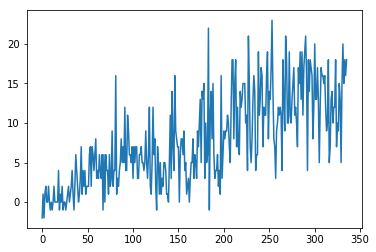

In [10]:
# Attempt 1 
num_episodes = 2000
scores, agent = train(num_episodes, env, brain_name, state_size, action_size, 
      eps=0.1, 
      eps_decay=0.999, 
      buff_size=int(1e5), 
      samp_size=64, 
      learn_freq=4, 
      gamma=0.99, 
      optim_lr=5e-4, 
      tau=1e-3, 
      net_params=[128,256,128])